In [1]:
from kitti_util import *
from pylab import *
from plot_util import *

绘制图片和点云数据的函数

In [2]:
def draw_image_point(img_id,kitti_path):
    path_img = kitti_path+"/image_2/%06d.png"%img_id
    path_points =kitti_path+"/velodyne/%06d.bin"%img_id   #点云
    points = np.fromfile(path_points, dtype=np.float32).reshape(-1, 4)#点云数据
    calib = Calibration(kitti_path+"/calib/%06d.txt"%img_id) ## Path ## need to be changed
    df = read_detection(kitti_path+"/label_2/%06d.txt"%img_id)  #读取标签，可以选择过滤
    # print(df.head(5))#查看前5个标签
    print(len(df))


    ##############   image   #####################
    image = cv2.imread(path_img)#读取数据
    # 绘制3dbox
    for o in range(len(df)):
        corners_3d_cam2 = compute_3d_box_cam2(*df.loc[o, ['height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']])
        pts_2d = calib.project_rect_to_image(corners_3d_cam2.T)
        image = draw_projected_box3d(image, pts_2d, color=(180,240,0), thickness=2)#(255,0,255)原始配色
    #绘制图像
    image_new = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,20))  # 打开一个画布
    plt.axis('off')  # 不打开坐标轴
    plt.tight_layout()
    plt.imshow(image_new)
    # plt.savefig("../res_image/image_show.png")#保存
    plt.show()  # 加上这个才能显示


    ##############   points   #####################
    side_const=(-10, 10)#左右显示的范围，(-30, 30-0.05)为完整范围。
    fwd_const=(0, 30)#前后显示的范围，(-30, 60-0.05)为完整范围。一般只显示前半部分(0, 30)
    height_const=(-2, 2)#上下显示的范围,(-2, 2)为完整范围。
    box_color="mediumspringgreen" #box色彩，原始"fuchsia"
    box_linewidth=2.5  #box线宽

    res_const=0.07 #res决定着点云的分辨率，越小分辨率越高
    zres_const=2.0 #z方向的切片长度，决定在z方向的通道数。
    top = point_cloud_2_top(points, res=res_const,zres=zres_const, side_range=side_const, fwd_range=fwd_const,height_range=height_const)
    top = np.array(top, dtype = np.float32)
    print("热力图尺寸：",top.shape)#在z方向有多少通道取决于切片长度zres

    point_slices=top[:,:,0]#选择要显示的切片，0是下标，一般0即可，可以多尝试几个
    point_slices=np.where(point_slices>np.min(point_slices),0,1)#将切片二值化，大于min的为1，小于的为0，让图像更清晰。

    fig, ax = plt.subplots(figsize=(10, 10))
    # ax.imshow(point_slices,aspect='equal')#
    ax.imshow(point_slices, cmap=plt.cm.binary_r,aspect='equal') # binary为黑白色，加_r取反为白黑色，渐变色
    # ax.imshow(point_slices, cmap=plt.cm.twilight,aspect='equal')


    #绘制2Dbox框图
    draw_2Dbox(df_=df ,calib_=calib,ax_=ax ,res_const_=res_const ,side_const_=side_const ,
                fwd_const_=fwd_const ,box_linewidth_=box_linewidth ,box_color_=box_color)

    plt.axis('off')
    plt.tight_layout()#自动调整子图参数,使之填充整个图像区域
    plt.savefig("../res_image/point_show.png")#保存
    plt.show()


执行

9


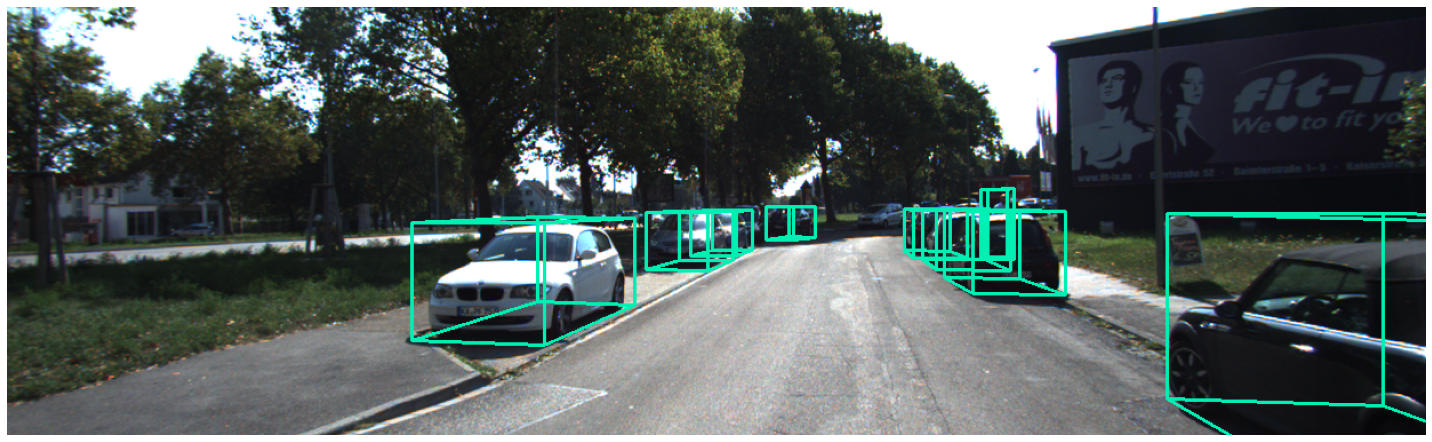

热力图尺寸： (429, 286, 3)


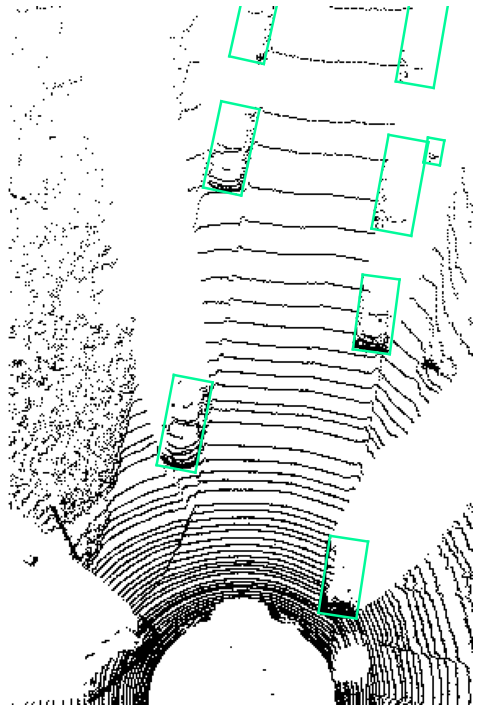

In [3]:
img_id_ = 10
#数据集路径
kitti_path_="/home/huangjiangeng/OpenPCDet/data/kitti/training"
draw_image_point(img_id=img_id_,kitti_path=kitti_path_)